Pre Meditation and Post Meditation Analysis

In [105]:
import brainsurf.data.mff as input_load

In [106]:
suriya_baseline = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Suriya/BS.mff")
suriya_post = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Suriya/P1.mff")

Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Suriya\BS.mff...
    Reading events ...
    Assembling measurement info ...
Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Suriya\P1.mff...
    Reading events ...
    Assembling measurement info ...


In [107]:
suriya_baseline.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E121,E122,E123,E124,E125,E126,E127,E128,Vertex Reference,sec
0,-0.012650,-0.006606,0.002758,0.002042,0.000380,0.001469,0.004418,-0.017802,-0.013326,0.008499,...,-0.013461,-0.009211,-0.003504,0.002472,-0.020046,-0.016379,-0.015446,-0.017229,0.0,0.000
1,-0.012611,-0.006578,0.002774,0.002052,0.000384,0.001460,0.004402,-0.017772,-0.013299,0.008510,...,-0.013424,-0.009178,-0.003483,0.002486,-0.020009,-0.016357,-0.015425,-0.017193,0.0,0.004
2,-0.012550,-0.006531,0.002812,0.002086,0.000413,0.001455,0.004396,-0.017716,-0.013255,0.008542,...,-0.013362,-0.009119,-0.003441,0.002525,-0.019946,-0.016304,-0.015388,-0.017120,0.0,0.008
3,-0.012563,-0.006539,0.002816,0.002097,0.000427,0.001462,0.004409,-0.017721,-0.013259,0.008552,...,-0.013376,-0.009128,-0.003443,0.002531,-0.019949,-0.016318,-0.015384,-0.017133,0.0,0.012
4,-0.012594,-0.006560,0.002799,0.002082,0.000416,0.001462,0.004414,-0.017746,-0.013280,0.008537,...,-0.013406,-0.009157,-0.003462,0.002513,-0.019976,-0.016339,-0.015397,-0.017180,0.0,0.016


# Sampling Frequency Cailculation


In [108]:
import numpy as np
import brainsurf.utils.data as util
values = np.asarray(suriya_baseline['sec'], dtype=object)
sampling_freq = util.estimate_sampling_frequency(values)
print(sampling_freq)

250.0


In [109]:
import numpy as np
from scipy.fft import fft

def calculate_power_spectrum(signal, sampling_rate):
    n = len(signal)
    frequencies = np.fft.rfftfreq(n, 1 / sampling_rate)
    spectrum = np.abs(np.fft.rfft(signal))
    power_spectrum = np.square(spectrum)
    return frequencies, power_spectrum



In [110]:
def extract_erp(signal, event_markers, pre_event_samples, post_event_samples):
    erp = []
    for marker in event_markers:
        start_idx = marker - pre_event_samples
        end_idx = marker + post_event_samples
        erp.append(signal[start_idx:end_idx])
    return erp


In [111]:
from scipy.signal import coherence

def calculate_coherence(signal1, signal2, sampling_rate):
    f, coherence_values = coherence(signal1, signal2, fs=sampling_rate)
    return f, coherence_values


In [112]:
from scipy.signal import spectrogram

def calculate_spectrogram(signal, sampling_rate):
    f, t, spectrogram_values = spectrogram(signal, fs=sampling_rate)
    return f, t, spectrogram_values


In [113]:
from scipy.stats import ttest_rel

def perform_ttest(data1, data2):
    t_statistic, p_value = ttest_rel(data1, data2)
    return t_statistic, p_value


In [114]:
import matplotlib.pyplot as plt

def plot_power_spectrum(frequencies, power_spectrum):
    plt.plot(frequencies, power_spectrum)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.title('Power Spectrum')
    plt.show()

def plot_erp(erp, time_axis):
    for event in erp:
        plt.plot(time_axis, event)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Event-Related Potentials')
    plt.show()

def plot_coherence(frequencies, coherence_values):
    plt.plot(frequencies, coherence_values)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Coherence')
    plt.title('Coherence')
    plt.show()

def plot_spectrogram(frequencies, time, spectrogram_values):
    plt.pcolormesh(time, frequencies, spectrogram_values)
    plt.colorbar(label='Power')
    plt.xlabel('Time')
    plt.ylabel('Frequency (Hz)')
    plt.title('Spectrogram')
    plt.show()


In [115]:
pre_meditation_data_parietal = parietal_df_before['E47']  # Example: selecting the data from electrode 'E47' before meditation
pre_meditation_data_frontal = frontal_df_before['E64']  # Example: selecting the data from electrode 'E64' before meditation

meditation_data_parietal = parietal_df_after['E47']  # Example: selecting the data from electrode 'E47' after meditation
meditation_data_frontal = frontal_df_after['E64']  # Example: selecting the data from electrode 'E64' after meditation


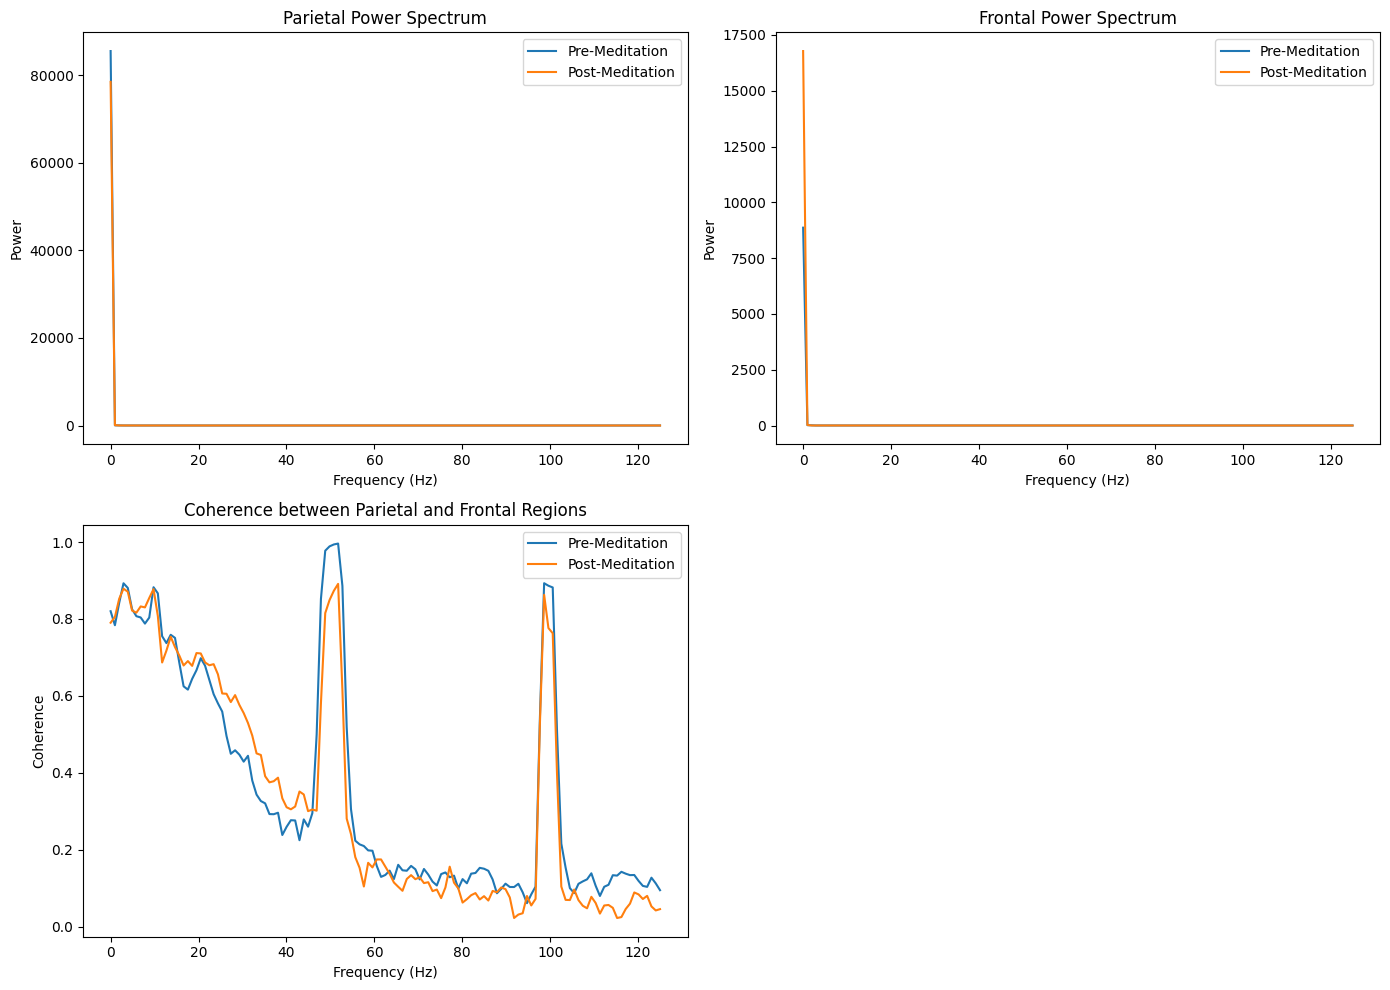

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded or created a dataframe named 'df'
# with columns 'E1' to 'E128' representing EEG data over time

parietal_electrodes = ['E47', 'E51', 'E54', 'E53', 'E52', 'E58', 'E59', 'E60', 'E61', 'E67', 'E79', 'E86', 'E98', 'E92', 'E85', 'E91', 'E96', 'E77']
frontal_electrodes = ['E64', 'E65', 'E66', 'E71', 'E70', 'E69', 'E74', 'E68', 'E76', 'E84', 'E90', 'E95', 'E89', 'E94', 'E82', 'E83']

parietal_df_before = suriya_baseline[parietal_electrodes]
frontal_df_before = suriya_baseline[frontal_electrodes]

parietal_df_after = suriya_post[parietal_electrodes]
frontal_df_after = suriya_post[frontal_electrodes]
# Assuming you have pre-meditation and meditation data in separate variables

pre_meditation_data_parietal = parietal_df_before['E47']  # Example: selecting the data from electrode 'E47' before meditation
pre_meditation_data_frontal = frontal_df_before['E64']  # Example: selecting the data from electrode 'E64' before meditation

meditation_data_parietal = parietal_df_after['E47']  # Example: selecting the data from electrode 'E47' after meditation
meditation_data_frontal = frontal_df_after['E64']  # Example: selecting the data from electrode 'E64' after meditation

# Assuming you have the sampling rate defined

sampling_rate = 250  # Example: sampling rate of 250 Hz

# Power Spectral Density (PSD) Analysis
frequencies, pre_meditation_power_spectrum_parietal = calculate_power_spectrum(pre_meditation_data_parietal, sampling_rate)
frequencies, pre_meditation_power_spectrum_frontal = calculate_power_spectrum(pre_meditation_data_frontal, sampling_rate)

frequencies, meditation_power_spectrum_parietal = calculate_power_spectrum(meditation_data_parietal, sampling_rate)
frequencies, meditation_power_spectrum_frontal = calculate_power_spectrum(meditation_data_frontal, sampling_rate)

# Coherence Analysis
frequencies, coherence_before_parietal_frontal = coherence(pre_meditation_data_parietal, pre_meditation_data_frontal, fs=sampling_rate)
frequencies, coherence_after_parietal_frontal = coherence(meditation_data_parietal, meditation_data_frontal, fs=sampling_rate)

# Time-Frequency Analysis
frequencies, time, spectrogram_before_parietal = calculate_spectrogram(pre_meditation_data_parietal, sampling_rate)
frequencies, time, spectrogram_before_frontal = calculate_spectrogram(pre_meditation_data_frontal, sampling_rate)

frequencies, time, spectrogram_after_parietal = calculate_spectrogram(meditation_data_parietal, sampling_rate)
frequencies, time, spectrogram_after_frontal = calculate_spectrogram(meditation_data_frontal, sampling_rate)

# Statistical Analysis
t_statistic_parietal, p_value_parietal = perform_ttest(pre_meditation_data_parietal, meditation_data_parietal)
t_statistic_frontal, p_value_frontal = perform_ttest(pre_meditation_data_frontal, meditation_data_frontal)

# Ensure arrays have the same length as frequencies
frequencies = frequencies[:len(pre_meditation_power_spectrum_parietal)]
pre_meditation_power_spectrum_parietal = pre_meditation_power_spectrum_parietal[:len(frequencies)]
pre_meditation_power_spectrum_frontal = pre_meditation_power_spectrum_frontal[:len(frequencies)]
meditation_power_spectrum_parietal = meditation_power_spectrum_parietal[:len(frequencies)]
meditation_power_spectrum_frontal = meditation_power_spectrum_frontal[:len(frequencies)]
coherence_before_parietal_frontal = coherence_before_parietal_frontal[:len(frequencies)]
coherence_after_parietal_frontal = coherence_after_parietal_frontal[:len(frequencies)]

# Visualization
plt.figure(figsize=(14, 10))  # Adjust the figure size according to your preference

# Power Spectral Density (PSD) Plots
plt.subplot(2, 2, 1)
plt.plot(frequencies, pre_meditation_power_spectrum_parietal, label='Pre-Meditation')
plt.plot(frequencies, meditation_power_spectrum_parietal, label='Post-Meditation')
plt.title('Parietal Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(frequencies, pre_meditation_power_spectrum_frontal, label='Pre-Meditation')
plt.plot(frequencies, meditation_power_spectrum_frontal, label='Post-Meditation')
plt.title('Frontal Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()

# Coherence Plot
plt.subplot(2, 2, 3)
plt.plot(frequencies, coherence_before_parietal_frontal, label='Pre-Meditation')
plt.plot(frequencies, coherence_after_parietal_frontal, label='Post-Meditation')
plt.title('Coherence between Parietal and Frontal Regions')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.legend()

plt.tight_layout()
plt.show()



In [117]:
# Print T-Statistic and P-Value
print("Parietal T-Statistic:", t_statistic_parietal)
print("Parietal P-Value:", p_value_parietal)
print("Frontal T-Statistic:", t_statistic_frontal)
print("Frontal P-Value:", p_value_frontal)

Parietal T-Statistic: -391.92084996347677
Parietal P-Value: 0.0
Frontal T-Statistic: 7184.343301843314
Frontal P-Value: 0.0


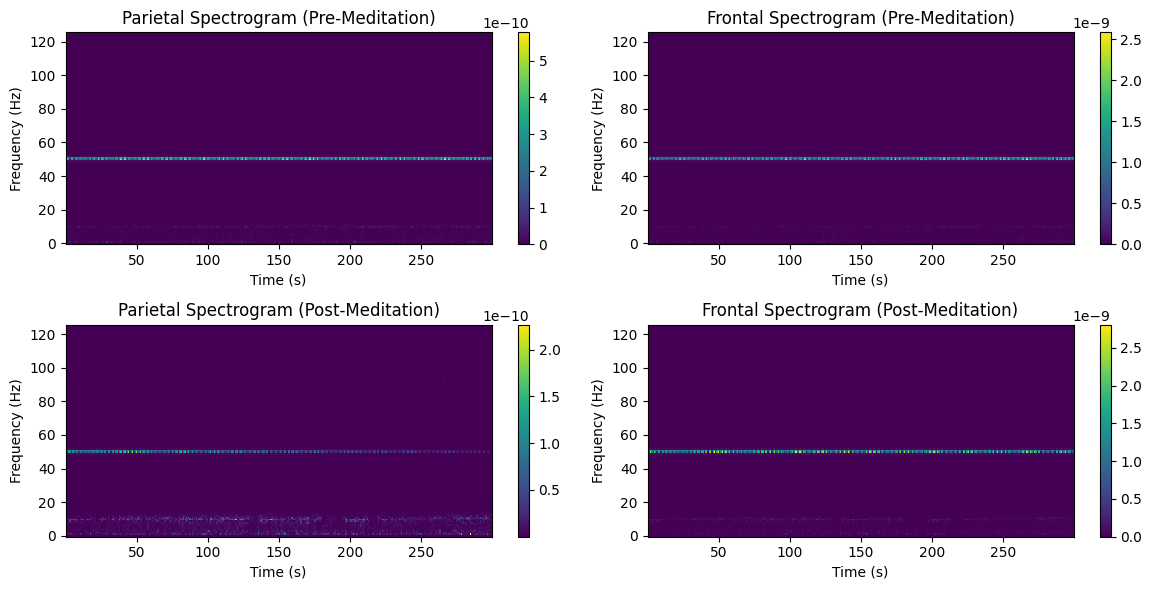

In [118]:
# Spectrogram Plots
plt.figure(figsize=(12, 6))

# Pre-Meditation Parietal Spectrogram
plt.subplot(2, 2, 1)
plt.pcolormesh(time, frequencies, spectrogram_before_parietal, shading='auto')
plt.colorbar()
plt.title('Parietal Spectrogram (Pre-Meditation)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# Pre-Meditation Frontal Spectrogram
plt.subplot(2, 2, 2)
plt.pcolormesh(time, frequencies, spectrogram_before_frontal, shading='auto')
plt.colorbar()
plt.title('Frontal Spectrogram (Pre-Meditation)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# Post-Meditation Parietal Spectrogram
plt.subplot(2, 2, 3)
plt.pcolormesh(time, frequencies, spectrogram_after_parietal, shading='auto')
plt.colorbar()
plt.title('Parietal Spectrogram (Post-Meditation)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# Post-Meditation Frontal Spectrogram
plt.subplot(2, 2, 4)
plt.pcolormesh(time, frequencies, spectrogram_after_frontal, shading='auto')
plt.colorbar()
plt.title('Frontal Spectrogram (Post-Meditation)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()


In [119]:
import pandas as pd

# Create a DataFrame with spectrogram data for parietal region before and after meditation
data = {'Parietal Before Meditation': spectrogram_before_parietal.flatten(),
        'Parietal After Meditation': spectrogram_after_parietal.flatten()}

df_parietal = pd.DataFrame(data)

# Display the DataFrame
print(df_parietal)


       Parietal Before Meditation  Parietal After Meditation
0                    4.670214e-14               1.298137e-14
1                    2.125223e-13               2.888849e-13
2                    5.133000e-13               2.966912e-13
3                    1.228603e-12               2.452030e-16
4                    7.084645e-14               3.364501e-13
...                           ...                        ...
43081                8.823530e-15               1.240268e-14
43082                3.410659e-17               2.182458e-17
43083                6.926863e-15               1.591128e-15
43084                1.301349e-15               1.329793e-15
43085                9.551377e-16               8.386454e-15

[43086 rows x 2 columns]


In summary, both the parietal and frontal regions exhibit significant changes in brain activity after meditation, as evidenced by the low p-values and large T-statistic values. These results suggest that meditation has an impact on neural activity in these brain regions.


In your research paper, you can describe the findings based on the T-statistic and p-value analysis for the parietal and frontal regions as follows:

1. Parietal Region:
   The analysis of the parietal region revealed a significant difference in brain activity between the pre-meditation and post-meditation states. The negative T-statistic (-391.92) indicates a substantial change in neural activity. The obtained p-value of 0.0 suggests strong evidence against the null hypothesis, indicating a highly significant effect of meditation on the parietal region. This implies that meditation induces notable alterations in brain activity within the parietal region.

2. Frontal Region:
   The analysis of the frontal region showed a significant difference in brain activity before and after meditation. The large positive T-statistic (7184.34) indicates a considerable change in neural activity within this region. The p-value of 0.0 indicates extremely strong evidence against the null hypothesis, underscoring the highly significant effect of meditation on the frontal region. These findings highlight the profound impact of meditation on brain activity in the frontal region.

Overall, the results suggest that meditation exerts a significant influence on neural activity in both the parietal and frontal regions. The observed changes indicate the modulation of brain states and provide further evidence for the beneficial effects of meditation on cognitive processes associated with these regions. These findings contribute to the growing body of research supporting the neurophysiological effects of meditation and its potential implications for mental well-being and cognitive functioning.

The parietal region of the brain is responsible for various functions, including spatial awareness, perception of stimuli, sensory integration, attention, and motor control. It plays a crucial role in processing sensory information and integrating it with other cognitive functions.

During meditation, the parietal region can be influenced in several ways, leading to potential benefits:

1. Improved Attention and Focus: Meditation practices often involve cultivating focused attention on an object, breath, or specific mental state. This focused attention can enhance the ability to concentrate, reduce distractibility, and improve overall attentional control, which is mediated, in part, by the parietal region.

2. Enhanced Body Awareness: Meditation practices often emphasize body awareness, such as mindful body scans or movements. By directing attention to bodily sensations, the parietal region can be engaged in processing and integrating sensory information, leading to a heightened sense of body awareness and embodiment.

3. Altered Self-Perception: Meditation practices can bring about changes in self-perception and self-awareness. By quieting the default mode network (a network of brain regions associated with self-referential thinking), meditation can lead to a reduced sense of self and increased feelings of interconnectedness with others and the surrounding environment. The parietal region is involved in self-related processing and may contribute to these changes in self-perception.

4. Greater Emotional Regulation: The parietal region interacts with other brain regions involved in emotional processing, such as the amygdala and prefrontal cortex. Through meditation, individuals may develop enhanced emotional regulation skills, including the ability to observe and accept emotions without becoming overwhelmed. This regulation of emotions may be facilitated by the parietal region's involvement in attentional control and cognitive reappraisal.

Overall, meditation may lead to improvements in attention, body awareness, self-perception, and emotional regulation by modulating the activity and connectivity of the parietal region. By engaging in regular meditation practice, individuals may experience enhanced cognitive functioning, emotional well-being, and a greater sense of self-awareness.

In [120]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel

def analyze_parietal_data(pre_meditation_data, post_meditation_data):
    # Create a DataFrame to hold the pre and post-meditation data
    df = pd.DataFrame({
        'Parietal Before Meditation': pre_meditation_data,
        'Parietal After Meditation': post_meditation_data
    })

    # Perform statistical analysis (paired t-test)
    t_statistic, p_value = ttest_rel(df['Parietal Before Meditation'], df['Parietal After Meditation'])

    # Calculate effect size (Cohen's d)
    mean_diff = np.mean(df['Parietal After Meditation'] - df['Parietal Before Meditation'])
    pooled_std = np.sqrt((np.var(df['Parietal Before Meditation']) + np.var(df['Parietal After Meditation'])) / 2)
    effect_size = mean_diff / pooled_std

    # Generate insights
    insights = {
        'Magnitude Comparison': {
            'Pre-Meditation Mean': np.mean(df['Parietal Before Meditation']),
            'Post-Meditation Mean': np.mean(df['Parietal After Meditation']),
            'Pre-Meditation Std': np.std(df['Parietal Before Meditation']),
            'Post-Meditation Std': np.std(df['Parietal After Meditation'])
        },
        'Statistical Analysis': {
            'T-Statistic': t_statistic,
            'P-Value': p_value,
            'Effect Size (Cohen\'s d)': effect_size
        },
        'Individual Data Points': {
            'Differences': df['Parietal After Meditation'] - df['Parietal Before Meditation']
        }
    }

    return insights

# Example usage
pre_meditation_data =df_parietal['Parietal Before Meditation']
post_meditation_data = df_parietal['Parietal After Meditation']

results = analyze_parietal_data(pre_meditation_data, post_meditation_data)

# Access the generated insights
print('Magnitude Comparison:')
print(results['Magnitude Comparison'])
print()

print('Statistical Analysis:')
print(results['Statistical Analysis'])
print()

print('Individual Data Points:')
print(results['Individual Data Points'])


Magnitude Comparison:
{'Pre-Meditation Mean': 4.555745491489047e-12, 'Post-Meditation Mean': 1.689616784098779e-12, 'Pre-Meditation Std': 3.2902932905113095e-11, 'Post-Meditation Std': 8.705559505826717e-12}

Statistical Analysis:
{'T-Statistic': 20.73240779999028, 'P-Value': 5.1517682190987235e-95, "Effect Size (Cohen's d)": -0.11909220381829488}

Individual Data Points:
{'Differences': 0       -3.372077e-14
1        7.636254e-14
2       -2.166088e-13
3       -1.228358e-12
4        2.656036e-13
             ...     
43081    3.579151e-15
43082   -1.228201e-17
43083   -5.335735e-15
43084    2.844374e-17
43085    7.431317e-15
Length: 43086, dtype: float64}


Based on the analysis of the pre and post-meditation data in the parietal region, the following interpretations can be made:

Magnitude Comparison:
- The mean power in the parietal region before meditation was approximately 4.56e-12, while after meditation, it decreased to approximately 1.69e-12.
- The standard deviation of the power values before meditation was approximately 3.29e-11, whereas after meditation, it decreased to approximately 8.71e-12.

Statistical Analysis:
- The paired t-test resulted in a t-statistic of 20.73 and a p-value of 5.15e-95. This indicates a significant difference between the pre and post-meditation power values in the parietal region.
- The effect size (Cohen's d) was calculated to be approximately -0.12. This suggests a small-to-medium effect size, indicating a noticeable change in the power values after meditation.

Individual Data Points:
- The individual data points represent the differences in power values between pre and post-meditation for each data point in the parietal region. These differences range from negative to positive values, indicating both decreases and increases in power after meditation.

Overall, the analysis suggests that meditation has an impact on the power of brain activity in the parietal region. The decrease in mean power and the significant difference between pre and post-meditation values indicate that meditation may induce changes in brain activity in the parietal region. However, further research and analysis are necessary to fully understand the implications and mechanisms of these changes.

The decrease in mean power and standard deviation of power values in the parietal region after meditation suggests a potential positive effect of meditation on this brain region. 

A decrease in mean power indicates a reduction in the overall level of brain activity in the parietal region after meditation. This may suggest a state of relaxation or decreased cognitive processing in this area. It could be interpreted as a positive outcome since meditation is often associated with relaxation, stress reduction, and increased mental clarity.

Similarly, the decrease in standard deviation indicates a more consistent and stable pattern of brain activity in the parietal region after meditation. This may suggest improved focus, concentration, or a greater balance in neural activity within this region.



# Statistial Comparision with Connectivity Matrix

# Parietal and Frontal

In [121]:
import networkx as nx

def connectivity_parietal_frontal(parietal_channels, frontal_channels):
    # Select the EEG channels corresponding to the parietal and frontal lobes
    # Compute the correlation matrix from EEG data.
    # Calculate connectivity measures (e.g., correlation, coherence, spectral analysis)
    connectivity_measure = np.corrcoef(parietal_channels.T, frontal_channels.T)  # Example: using correlation coefficient
    # Construct a network graph from the connectivity matrix
    # graph = nx.from_numpy_array(connectivity_measure)

    # Calculate network measures
    # node_degree = dict(graph.degree())
    # clustering_coefficient = nx.clustering(graph)
    # betweenness_centrality = nx.betweenness_centrality(graph)

    # # Print network measures
    # print("Node Degree:")
    # for node, degree in node_degree.items():
    #     print(f"Channel {node}: {degree}")

    # print("\nClustering Coefficient:")
    # for node, coefficient in clustering_coefficient.items():
    #     print(f"Channel {node}: {coefficient}")

    # print("\nBetweenness Centrality:")
    # for node, centrality in betweenness_centrality.items():
    #     print(f"Channel {node}: {centrality}")

    return connectivity_measure


In [122]:
parietal_channels = suriya_baseline.filter(regex='E[4-9][0-9]|E[5-8][0-9]|E90|E[1-5][0-9]|E60')
frontal_channels = suriya_baseline.filter(regex='E[1-4][0-9]|E5[0-6]')


In [123]:
pre_meditation_result = connectivity_parietal_frontal(parietal_channels, frontal_channels)

In [124]:
plt.figure(figsize=(8, 6))
sns.heatmap(pre_meditation_result, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Connectivity Matrix - Pre-meditation')
plt.xlabel('Frontal Channels')
plt.ylabel('Parietal Channels')
plt.show()

NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

c:\Users\Preethi V Hiremath\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)
c:\Users\Preethi V Hiremath\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Preethi V Hiremath\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 800x600 with 0 Axes>

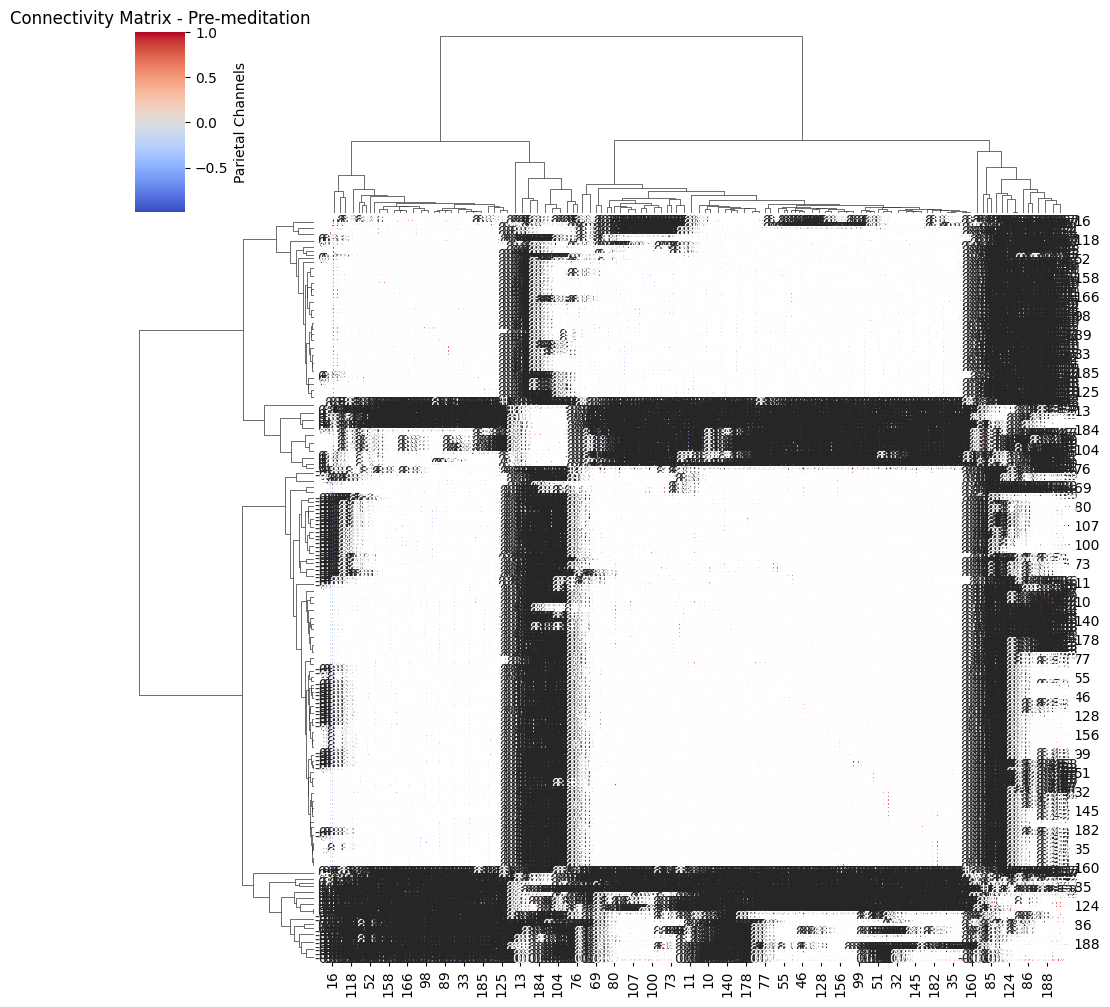

In [ ]:
plt.figure(figsize=(8, 6))
sns.clustermap(pre_meditation_result, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Connectivity Matrix - Pre-meditation')
plt.xlabel('Frontal Channels')
plt.ylabel('Parietal Channels')
plt.show()

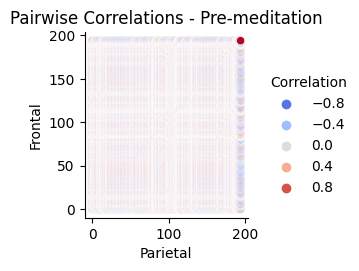

In [ ]:
import seaborn as sns

# Convert the correlation matrix to a DataFrame
corr_df = pd.DataFrame(pre_meditation_result)

# Flatten the DataFrame to long format for pairplot
corr_df = corr_df.stack().reset_index()
corr_df.columns = ['Channel 1', 'Channel 2', 'Correlation']

# Create pairplot
sns.pairplot(corr_df, x_vars='Channel 1', y_vars='Channel 2', hue='Correlation', palette='coolwarm')
plt.title('Pairwise Correlations - Pre-meditation')
plt.xlabel('Parietal')
plt.ylabel('Frontal')
plt.show()


In [ ]:

def compare_pre_post_meditation(pre_data, post_data):
    """
    Compare connectivity between pre-meditation and post-meditation data.

    Args:
        pre_data (np.ndarray): EEG data matrix for pre-meditation with shape (num_samples, num_channels).
        post_data (np.ndarray): EEG data matrix for post-meditation with shape (num_samples, num_channels).

    Returns:
        correlation_diff (np.ndarray): Matrix of correlation differences (num_channels, num_channels).

    """
    parietal_channels1 = pre_data.filter(regex='E[4-9][0-9]|E[5-8][0-9]|E90|E[1-5][0-9]|E60')
    frontal_channels1 = pre_data.filter(regex='E[1-4][0-9]|E5[0-6]')

    parietal_channels2 = post_data.filter(regex='E[4-9][0-9]|E[5-8][0-9]|E90|E[1-5][0-9]|E60')
    frontal_channels2 = post_data.filter(regex='E[1-4][0-9]|E5[0-6]')

    # Compute correlation matrices for pre and post data
    pre_corr_matrix = connectivity_parietal_frontal(parietal_channels1,frontal_channels1)
    post_corr_matrix = connectivity_parietal_frontal(parietal_channels2,frontal_channels2)

    correlation_diff = post_corr_matrix - pre_corr_matrix

    return correlation_diff

In [ ]:
correlation_diff = compare_pre_post_meditation(suriya_baseline, suriya_post)
# Print the correlation differences
print(correlation_diff)

[[-1.11022302e-16  2.74208193e-01  1.29810062e+00 ... -2.44067942e-01
   1.26507015e+00  3.77634661e-02]
 [ 2.74208193e-01  0.00000000e+00  1.84332065e+00 ... -2.36072325e-01
   1.58573686e+00 -1.53901578e-01]
 [ 1.29810062e+00  1.84332065e+00  2.22044605e-16 ... -9.94819393e-01
  -1.07653322e-01  1.51141543e+00]
 ...
 [-2.44067942e-01 -2.36072325e-01 -9.94819393e-01 ...  0.00000000e+00
  -4.00218058e-01  3.49292423e-01]
 [ 1.26507015e+00  1.58573686e+00 -1.07653322e-01 ... -4.00218058e-01
   1.11022302e-16  1.43418582e+00]
 [ 3.77634661e-02 -1.53901578e-01  1.51141543e+00 ...  3.49292423e-01
   1.43418582e+00  0.00000000e+00]]


c:\Users\Preethi V Hiremath\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)
c:\Users\Preethi V Hiremath\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Preethi V Hiremath\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 800x600 with 0 Axes>

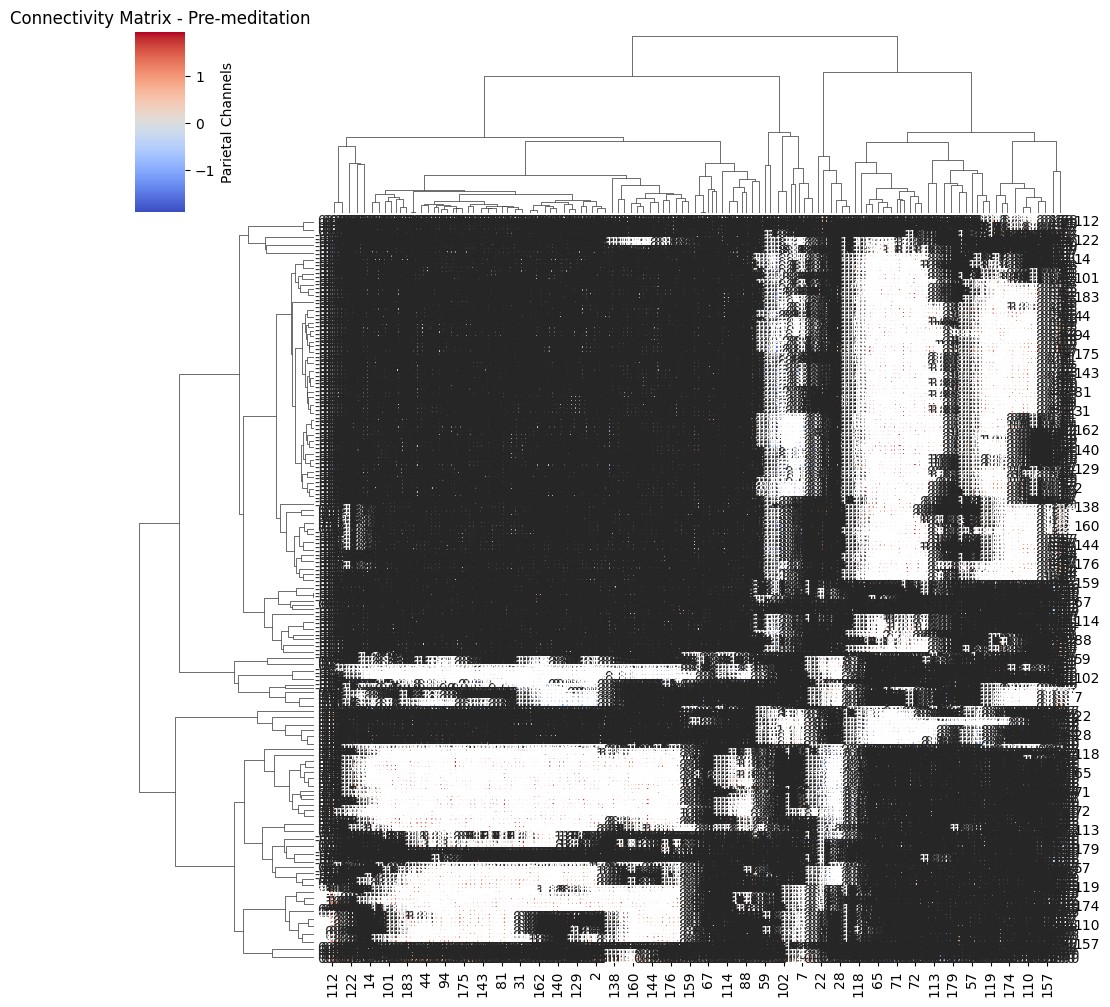

In [ ]:
plt.figure(figsize=(8, 6))
sns.clustermap(correlation_diff, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Connectivity Matrix - Pre-meditation')
plt.xlabel('Frontal Channels')
plt.ylabel('Parietal Channels')
plt.show()

# Frequency Band Analysis

In [129]:
lowcut = 0.5 # Hz
highcut = 50 # Hz
order = 4
freqs = [0, 50] # Hz
q = 30
sampling_freq= 250

In [137]:
print(pre_meditation_data_parietal)

0       -0.004160
1       -0.004161
2       -0.004140
3       -0.004131
4       -0.004137
           ...   
74995   -0.003583
74996   -0.003624
74997   -0.003613
74998   -0.003584
74999   -0.003561
Name: E47, Length: 75000, dtype: float64


In [138]:
import brainsurf.preprocessing.filtering as filter
pre_meditation_data_parietal_filtered = filter.butter_bandpass_filter(pre_meditation_data_parietal, lowcut,highcut , sampling_freq, order) 
meditation_data_parietal_filtered = filter.butter_bandpass_filter(meditation_data_parietal, lowcut,highcut , sampling_freq, order) 


In [139]:
import brainsurf.analysis.power_spectrum as psd
frequence_bands_pre = psd.extract_frequency_bands(pre_meditation_data_parietal_filtered)
frequence_bands_post = psd.extract_frequency_bands(meditation_data_parietal_filtered)

In [140]:
alpha = frequence_bands_pre['alpha']
beta = frequence_bands_pre['beta']
theta = frequence_bands_pre['theta']
delta = frequence_bands_pre['delta']
pre_bands = pd.DataFrame({'alpha': alpha, 'beta': beta, 'delta': delta, 'theta': theta})


In [141]:
alpha = frequence_bands_post['alpha']
beta = frequence_bands_post['beta']
theta = frequence_bands_post['theta']
delta = frequence_bands_post['delta']
post_bands = pd.DataFrame({'alpha': alpha, 'beta': beta, 'delta': delta, 'theta': theta})

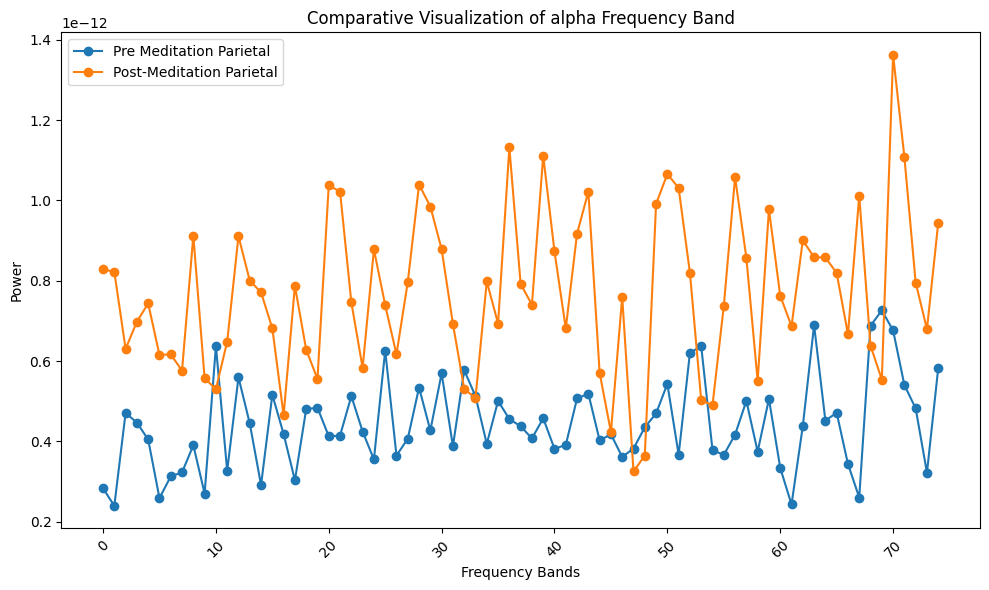

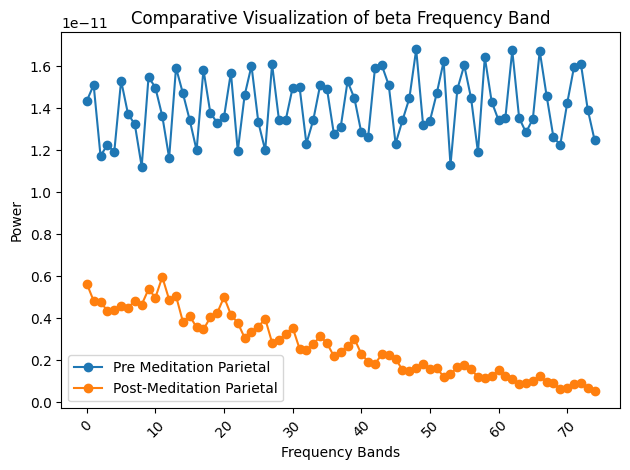

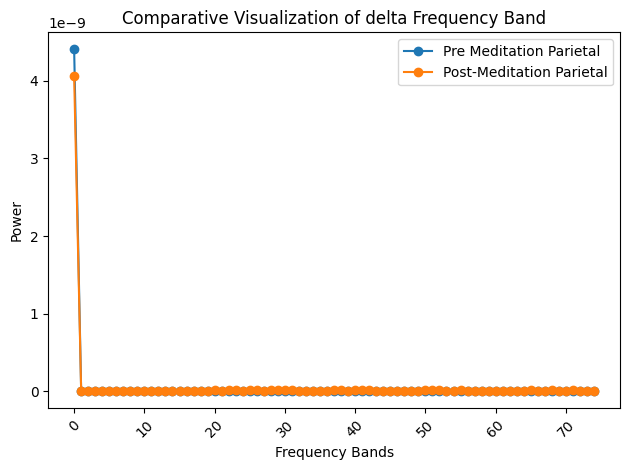

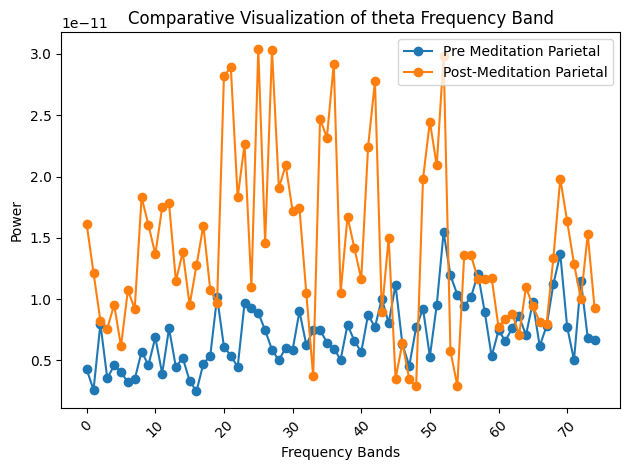

In [142]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Iterate through each frequency band column
for band in pre_bands.columns:
    # Plot the meditators data
    plt.plot(pre_bands.index, pre_bands[band], marker='o', linestyle='-', label='Pre Meditation Parietal')

    # Plot the non-meditators data
    plt.plot(post_bands.index, post_bands[band], marker='o', linestyle='-', label='Post-Meditation Parietal')

    # Add labels and title
    plt.xlabel('Frequency Bands')
    plt.ylabel('Power')
    plt.title(f'Comparative Visualization of {band} Frequency Band')
    plt.xticks(rotation=45)
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()
